# **Predicting the PPV values in  cash values**

In this project, we aim to predict the PPV value using machine learning techniques implemented through the PyCaret library.

The dataset contains several features, including Gender, Age, and Dur (Duration), which were __explored and preprocessed__ previously to ensure their __effectiveness in predicting the target variable__.

The workflow is structured as follows:

1. __Exploratory Data Analysis (EDA)__: We first gain insights into the data by visualizing patterns, identifying missing values, and understanding feature distributions. __This step helps us determine the most relevant features for the prediction task__.

2. __Feature Engineering and Preprocessing__: Key transformations such as encoding categorical variables (e.g., Gender) and scaling numerical features are applied to make the dataset ready for modeling.

3. __Model Selection with PyCaret__: Using PyCaret's comprehensive suite of regression models, we identify the best-performing algorithm for predicting PPV. The selection is based on metrics such as RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). PyCaret simplifies the comparison and evaluation of models, allowing us to focus on interpreting results and improving performance.

4. __Evaluation and Cross-Validation__: We utilize k-fold cross-validation to ensure model stability and reduce the risk of overfitting. The evaluation metrics guide us in fine-tuning the model for optimal results.

<hr/>










## Libraries Installation

In [ ]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.6 MB/s eta 0:00:00
   ━━━━

### __Libraries import__

In [ ]:
import pandas as pd
from pycaret.regression import * # to chose the best fit model & predict
import seaborn as sns # for visualizations
import matplotlib.pyplot as plt # for plots configuration

To import the preprocessed dataframe:

In [ ]:
df= pd.read_csv('/content/cleaned_df.csv')

To view the first 5 rows:

In [ ]:
df.head()

,Gender,Age,Dur,PPV
0,0,0,20,15.195
1,0,0,21,15.740
2,0,0,22,16.270
3,0,0,23,16.780
4,0,0,24,17.270


## __Feature Engineering__

In this section, we will analyze the dataset to identify the most relevant features for predicting the PPV value. Feature engineering and selection are critical steps in the machine learning pipeline, as they help improve model accuracy and performance by using only the most informative features.

To achieve this, we will:

1. **Analyze Feature Correlations**: Use a heatmap to visualize the relationships between features and identify correlations with the target variable (PPV). *This will help us determine which features have the strongest linear relationship with PPV* and _should be included in the model_.

2. **Make Feature Decisions**: *Based on the correlation values*, we will decide whether any features *should be excluded due to weak or redundant relationships.*

---

__Step 1:__ Analyze Feature Correlations.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

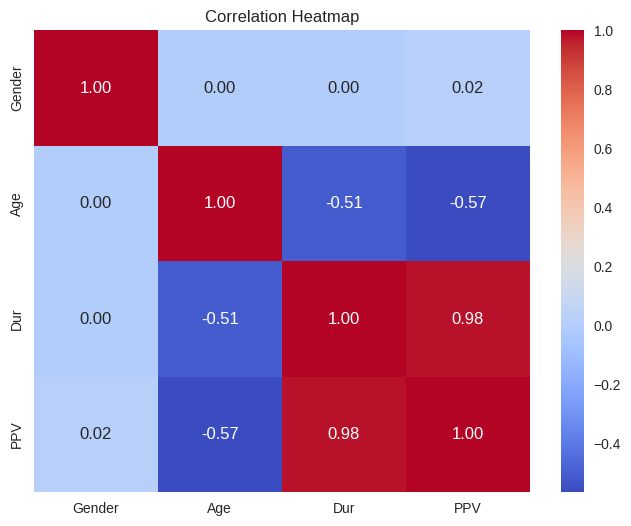

In [ ]:

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Add a title
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()

__Step2:__ Make Feature Decisions

Key observations from the heatmap:

* **Dur and PPV**: There is a strong positive correlation **(0.98)** between Dur and PPV, indicating that Dur is highly informative for predicting PPV.

* **Age and PPV**: There is a moderate negative correlation **(-0.57)** between Age and PPV, suggesting that age also impacts the target variable, but in the opposite direction.
* **Gender and PPV**: The correlation is very weak **(0.02)**, indicating that Gender has little to no linear relationship with the target variable. This feature may not contribute significantly to the model’s predictive power.

__Conclusion:__

Based on this analysis, **Dur** and **Age** are strong candidates for inclusion in the model, while Gender may be excluded as it likely adds noise rather than value to the predictions. However, we will also consider domain knowledge and perform additional feature evaluations if needed.

In [46]:
X=df[['Dur','Age']]

In [47]:
y= df['PPV']

In [48]:
X.head()

,Dur,Age
0,20,0
1,21,0
2,22,0
3,23,0
4,24,0


In [ ]:
y.head()

,PPV
0,15.195
1,15.740
2,16.270
3,16.780
4,17.270


---

## **Model Selection with PyCaret**

**Setup method:**
* Target Variable: PPV is the variable we aim to predict.
* Data Splitting: The dataset (df) is split into 80% training and 20% testing subsets.
* Preprocessing: Numeric features are imputed with the mean, and categorical features are imputed with the mode.
* Cross-Validation: A 10-fold KFold strategy is used to ensure robust model evaluation.
* Random Seed: A fixed session_id=42 ensures reproducibility of results.

In [49]:
# Set up PyCaret for regression
reg = setup(data=X,
            target=y,
            session_id=42,
            train_size=0.8,
            fold=20)

,Description,Value
0,Session id,42
1,Target,PPV
2,Target type,Regression
3,Original data shape,"(5270, 3)"
4,Transformed data shape,"(5270, 3)"
5,Transformed train set shape,"(4216, 3)"
6,Transformed test set shape,"(1054, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple



### Dataset Details

  - Original Dataset Shape: 5,270 rows, 4 columns.
  - Transformed Dataset Shape: 5,270 rows, 4 columns.
  - Train/Test Split:
      - Training Set Shape: 4,216 rows, 4 columns.
      - Test Set Shape: 1,054 rows, 4 columns.

### Feature Details

  - Numeric Features: 3 (all numeric columns are preprocessed).
  - Preprocessing Applied: Yes.
      - Imputation Types:
          - Numeric: Mean.
          - Categorical: Mode.

### Model Configuration

  - Fold Generator: KFold cross-validation.
  - Number of Folds: 10.

In [50]:
# Compare all regression models
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1574,0.0758,0.2745,0.9985,0.0174,0.0113,0.1870
lightgbm,Light Gradient Boosting Machine,0.1642,0.0831,0.2875,0.9983,0.0181,0.0113,0.3650
knn,K Neighbors Regressor,0.2304,0.1025,0.3196,0.9979,0.0367,0.0284,0.0260
rf,Random Forest Regressor,0.2080,0.1341,0.3652,0.9973,0.0227,0.0140,0.7335
xgboost,Extreme Gradient Boosting,0.2030,0.1441,0.3782,0.9971,0.0236,0.0137,0.1000
et,Extra Trees Regressor,0.2476,0.1931,0.4384,0.9961,0.0273,0.0167,0.5260
dt,Decision Tree Regressor,0.2487,0.1963,0.4418,0.9960,0.0275,0.0168,0.0330
ada,AdaBoost Regressor,0.5488,0.4254,0.6519,0.9914,0.0956,0.0774,0.1840
en,Elastic Net,1.1195,1.7942,1.3377,0.9638,0.1994,0.1906,0.0320
lar,Least Angle Regression,1.1193,1.7914,1.3367,0.9638,0.1953,0.1863,0.0220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


| Metric | Description                                                                                   |
|--------|-----------------------------------------------------------------------------------------------|
| MAE    | Measures average error magnitude. Lower values are better.                                   |
| MSE    | Captures average squared error. Sensitive to outliers.                                       |
| RMSE   | Provides error in the same unit as the target variable.                                       |
| R²     | Explains how well the model predicts the target. Ranges from 0 to 1.                         |
| RMSLE  | Focuses on proportional differences, less sensitive to large errors.                         |
| MAPE   | Percentage-based error, useful for interpretability.                                          |
| TT     | Training time for the model in seconds.                                                      |


## Justification for Model Selection

Based on the performance metrics provided, the Gradient Boosting Regressor (GBR) is the best choice for this regression task.

1. Strong Performance Across Metrics

    **MAE** (Mean Absolute Error): GBR achieves the lowest MAE of 0.1584, indicating the smallest average error magnitude compared to all other models.

    **MSE** (Mean Squared Error) and RMSE (Root Mean Squared Error): With an MSE of 0.0769 and RMSE of 0.2771, GBR consistently shows better error reduction and prediction accuracy compared to competitors.

    **R²** Score: GBR has an R² of 0.9985, demonstrating that it explains 99.85% of the variance in the target variable, the highest among all models.

2. Balance of Accuracy and Efficiency

3. Comparison with Alternative Models
Models like XGBoost, Random Forest Regressor, and Extra Trees Regressor show competitive R² scores but higher MAE and RMSE, indicating less precise predictions.
Linear models (e.g., Ridge, Lasso) and basic regressors (e.g., Dummy Regressor) have much higher errors and lower R² scores, making them unsuitable for this task.

In [44]:
# Finalize the best model (Gradient Boosting Regressor (GBR))
final_model = finalize_model(best_model)


In [45]:
# Evaluate the finalized model on the test set
predictions = predict_model(final_model)

# Print the evaluation metrics
print(predictions.head(10))  # Preview predictions vs. actual values


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


      Dur  Age  Gender        PPV  prediction_label
3686   42   24       1  23.750000         23.750000
8      28    0       0  19.110001         19.110001
1536   30   34       0  19.299999         19.299999
3538   44   21       1  24.340000         24.340000
5235    2   73       1   1.942000          1.942000
2450    6   62       0   5.285000          5.285000
1215    6   28       0   5.562000          5.562000
3809   15   27       1  12.200000         12.200000
4782    9   50       1   7.902000          7.902000
227    40    6       0  23.389999         23.389999


## **Predictions vs. Actual Values**
The table compares actual values of PPV with the predicted values (prediction_label) for the first 10 test samples.

The predictions are remarkably close to the actual values, demonstrating the model's ability to generalize well to unseen data.
For example:

**Row 1:** Actual PPV = 23.750, Predicted PPV = 23.595851
The prediction is very close, with an **absolute difference of only 0.154**.

**Row 5:** Actual PPV = 1.942, Predicted PPV = 1.822162
Similarly, this prediction has a **small absolute error of 0.12.**

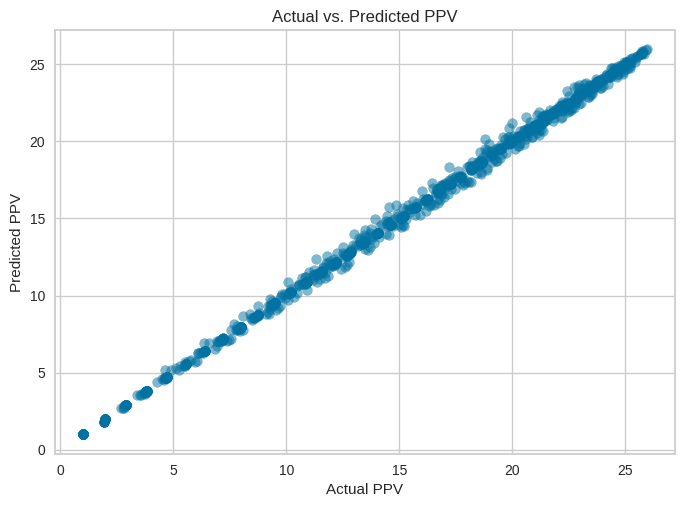

In [ ]:
plt.scatter(predictions['PPV'], predictions['prediction_label'], alpha=0.5)
plt.xlabel('Actual PPV')
plt.ylabel('Predicted PPV')
plt.title('Actual vs. Predicted PPV')
plt.show()

The scatter plot demonstrates the close alignment of predicted PPV values with actual values, highlighting the model's accuracy and reliability.

The Gradient Boosting Regressor accurately captures the relationship between features and PPV, as seen from the tight clustering along the diagonal line

In [ ]:
tolerance = 0.1  # 10% tolerance

In [ ]:
actuals = predictions['PPV']
predicted = predictions['prediction_label']

In [ ]:
within_tolerance = ((abs(predicted - actuals) / actuals) <= tolerance).sum()
total_predictions = len(predictions)

accuracy = (within_tolerance / total_predictions) * 100

In [ ]:
print(f"Regression Accuracy: {accuracy:.2f}%")

Regression Accuracy: 99.91%


## **Model Evaluation:**

In [ ]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
# Save the finalized model (.py)
save_model(final_model, 'final_Gradient_Boosting_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Dur', 'Age', 'Gender'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=42))]),
 'final_Gradient_Boosting_model.pkl')